In [1249]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.dates as mdates # type: ignore
import matplotlib.ticker as ticker # type: ignore
from matplotlib.axis import Axis # type: ignore
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
# %matplotlib inline

import time
begin = time.time()

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [1250]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [1251]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data), data

(10949,
         temp
 0      13.19
 1      12.20
 2      12.29
 3      12.42
 4      14.54
 ...      ...
 10944  18.92
 10945  19.22
 10946  19.34
 10947  19.96
 10948  20.00
 
 [10949 rows x 1 columns])

In [1252]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


<Axes: >

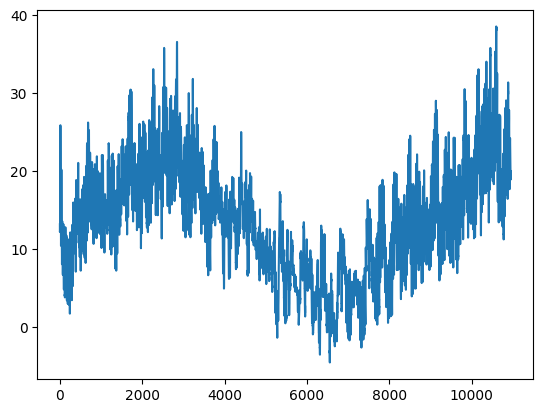

In [1253]:
data['temp'].plot()

In [1254]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')

then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2025, 7, 16, 12, 0))

In [1255]:
len(data), date_time_str

(10949, '16/04/24 07:00:00')

In [1256]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [1257]:
hours = mk_date(date_time_str,data)
#len(hours)
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [1258]:
data

,temp,hours,dates
0,13.19,19829.291667,16/04/24 07:00:00
1,12.20,19829.333333,16/04/24 08:00:00
2,12.29,19829.375000,16/04/24 09:00:00
3,12.42,19829.416667,16/04/24 10:00:00
4,14.54,19829.458333,16/04/24 11:00:00
...,...,...,...
10944,18.92,20285.291667,16/07/25 07:00:00
10945,19.22,20285.333333,16/07/25 08:00:00
10946,19.34,20285.375000,16/07/25 09:00:00
10947,19.96,20285.416667,16/07/25 10:00:00


In [1259]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
10944,16/07/25 07:00:00,18.92
10945,16/07/25 08:00:00,19.22
10946,16/07/25 09:00:00,19.34
10947,16/07/25 10:00:00,19.96


In [1260]:
import warnings
warnings.filterwarnings("ignore")


In [1261]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(        temp         hours              dates
 0      13.19  19829.291667  16/04/24 07:00:00
 1      12.20  19829.333333  16/04/24 08:00:00
 2      12.29  19829.375000  16/04/24 09:00:00
 3      12.42  19829.416667  16/04/24 10:00:00
 4      14.54  19829.458333  16/04/24 11:00:00
 ...      ...           ...                ...
 10944  18.92  20285.291667  16/07/25 07:00:00
 10945  19.22  20285.333333  16/07/25 08:00:00
 10946  19.34  20285.375000  16/07/25 09:00:00
 10947  19.96  20285.416667  16/07/25 10:00:00
 10948  20.00  20285.458333  16/07/25 11:00:00
 
 [10949 rows x 3 columns],
 10949)

In [1262]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [1263]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

np.float64(19.400000000000016)

In [1264]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

10925

In [1265]:
len(x)

10925

In [1266]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

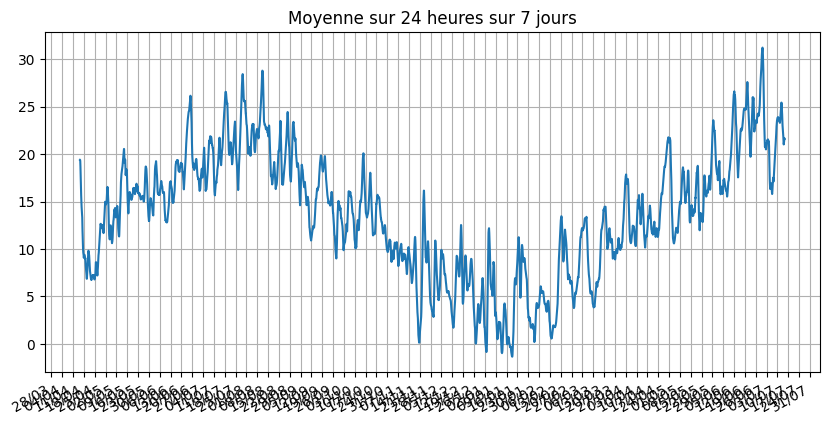

In [1267]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) # jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [1268]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=456, seconds=16820, microseconds=594461)

In [1269]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [1270]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2025, 7, 16, 11, 40, 20, 594461),
 456)

In [1271]:
moyenne = data['temp'].mean()
moyenne

np.float64(13.664996803361058)

np.float64(13.664996803361058)

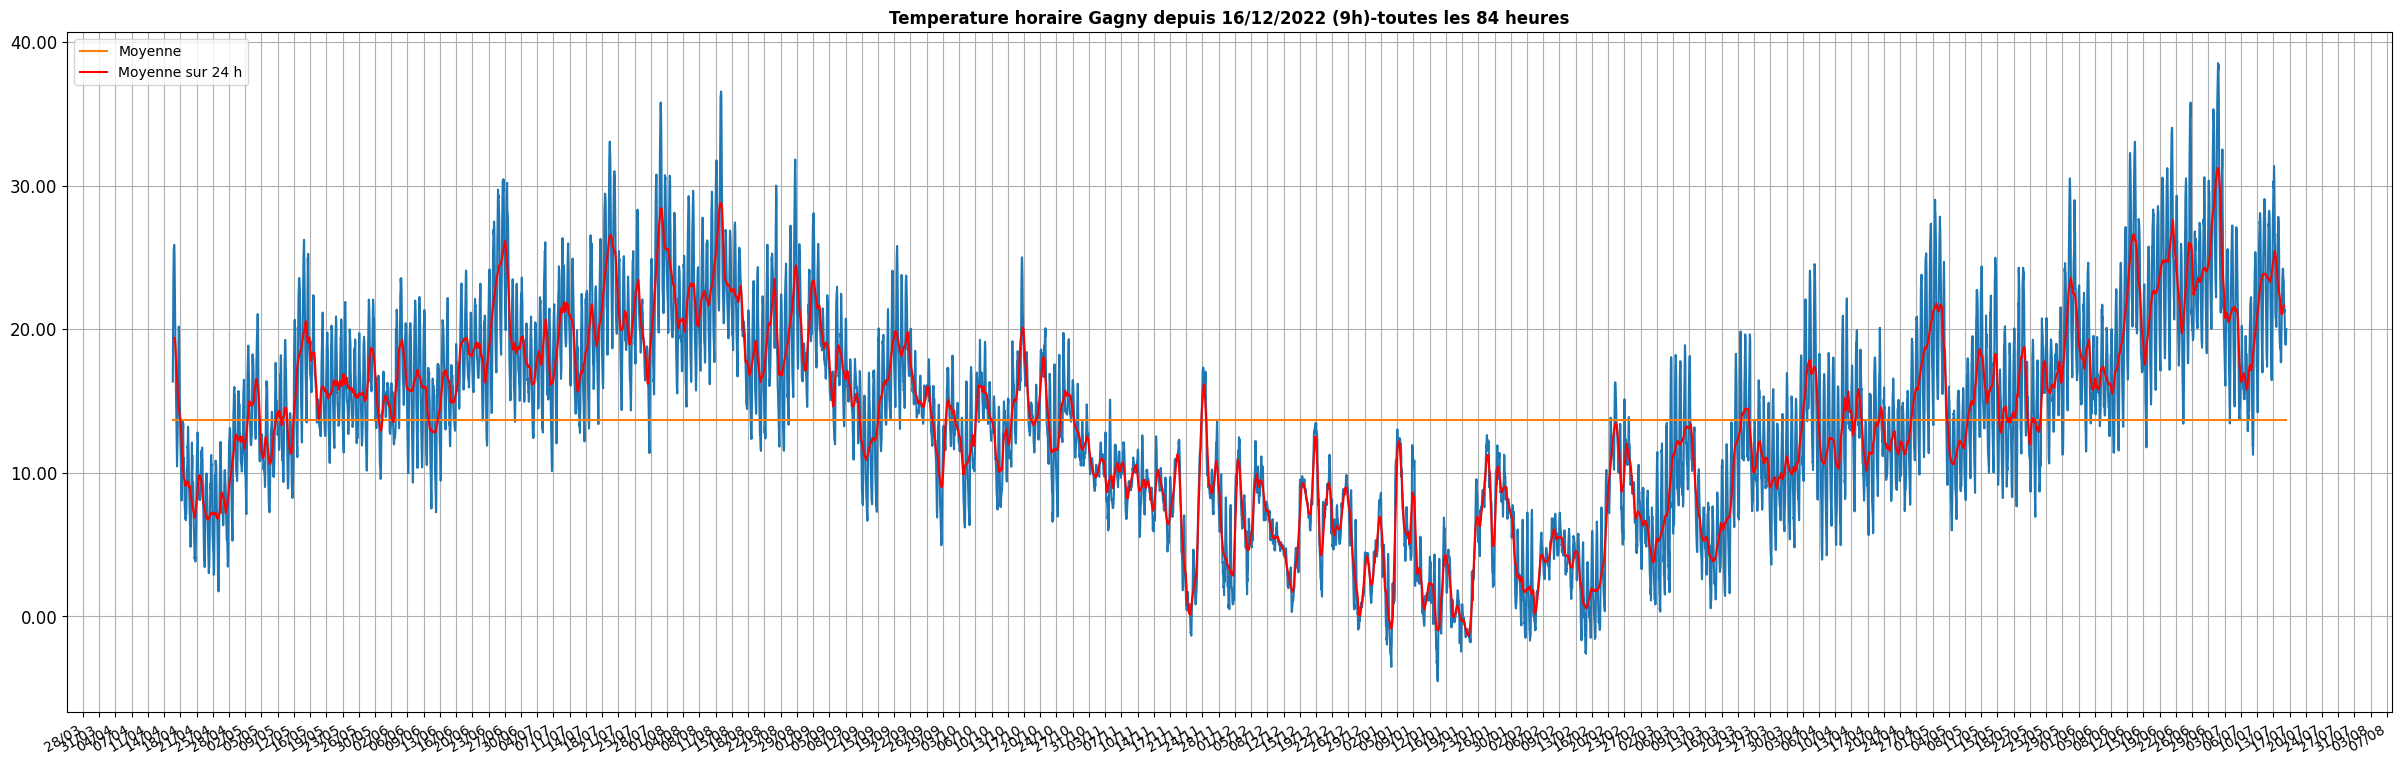

In [1272]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [1273]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
10944,18.92,20285.291667,16/07/25 07:00:00,-0.19
10945,19.22,20285.333333,16/07/25 08:00:00,0.30
10946,19.34,20285.375000,16/07/25 09:00:00,0.12
10947,19.96,20285.416667,16/07/25 10:00:00,0.62


<Axes: >

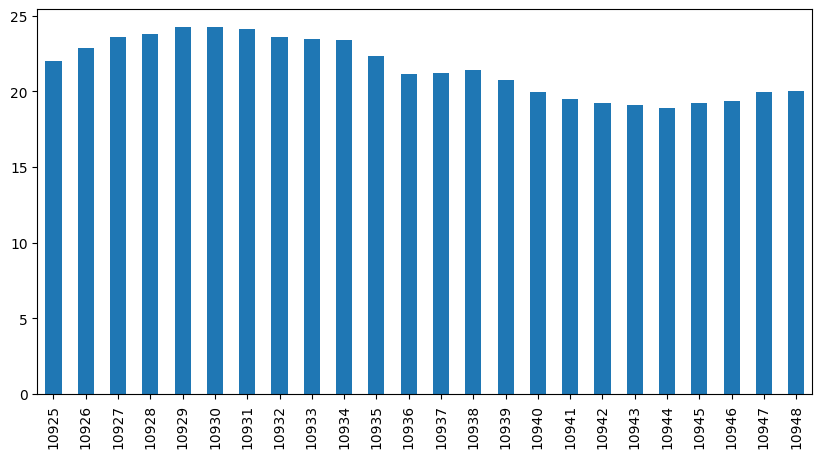

In [1274]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

In [1275]:
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
10944,18.92,20285.291667,16/07/25 07:00:00,-0.19
10945,19.22,20285.333333,16/07/25 08:00:00,0.30
10946,19.34,20285.375000,16/07/25 09:00:00,0.12
10947,19.96,20285.416667,16/07/25 10:00:00,0.62


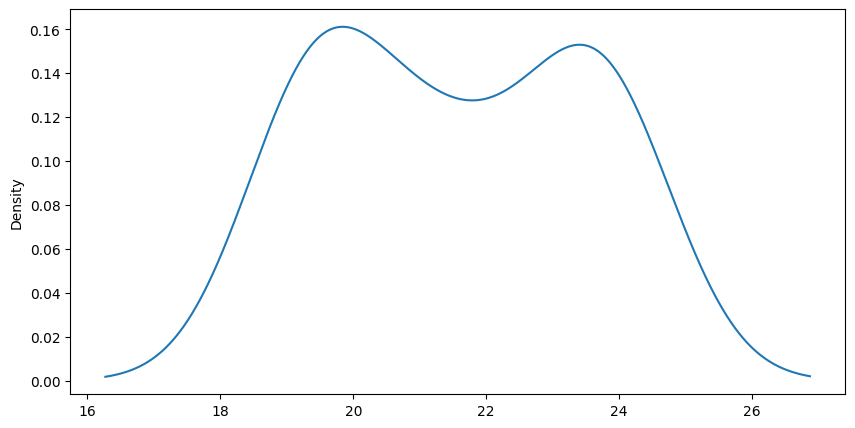

In [1276]:
span = 24
try:
    data.tail(span)['temp'].plot.kde(figsize=(10,5))
    #data['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

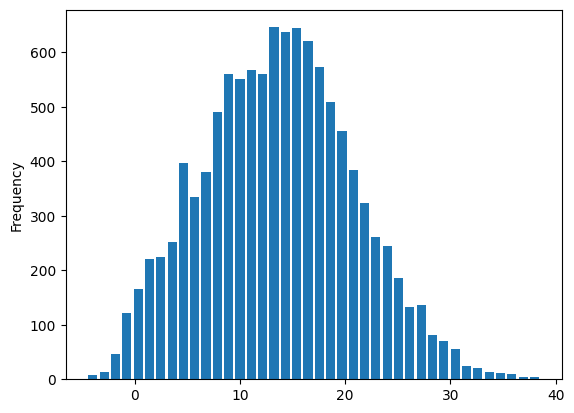

In [1277]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

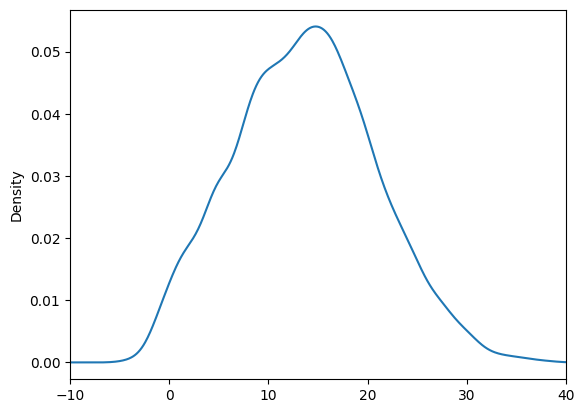

In [1278]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

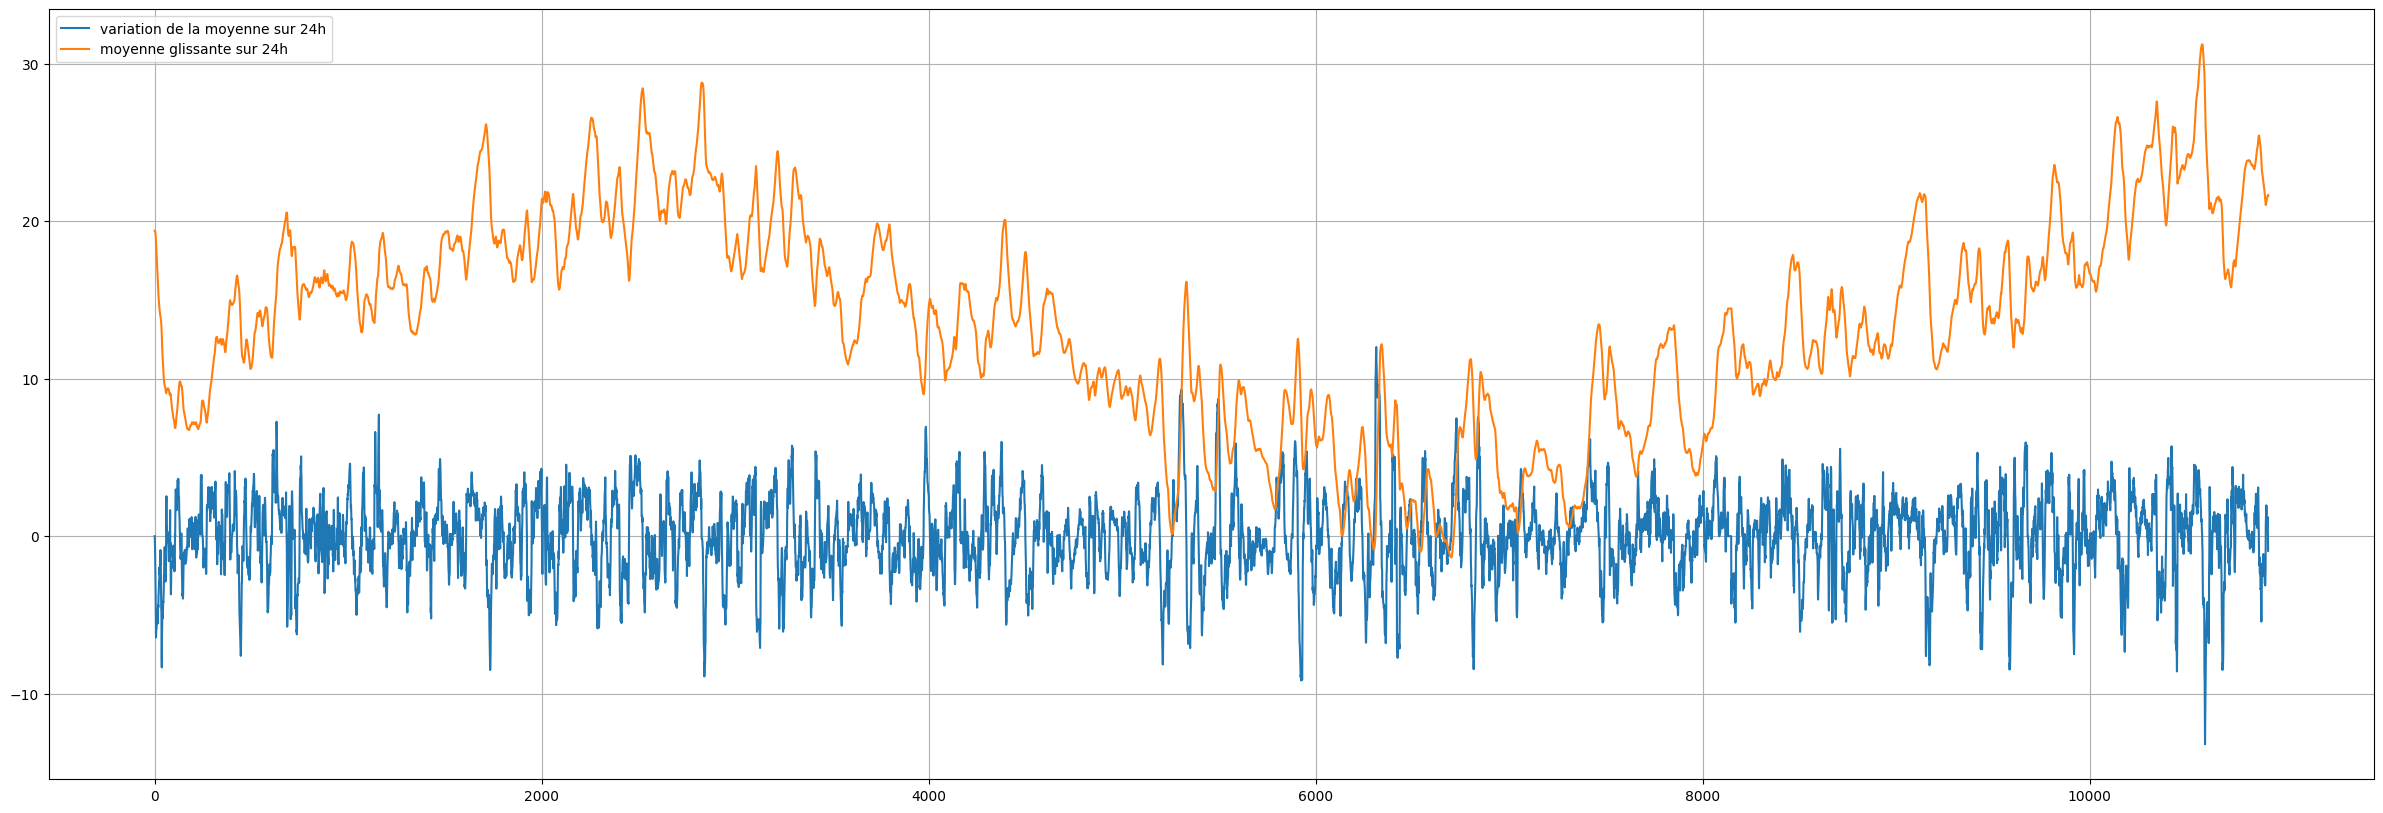

In [1279]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [1280]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [1281]:
window, days, interval

(24, 15, 12)

In [1282]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [1283]:
h

10589    20270.500000
10590    20270.541667
10591    20270.583333
10592    20270.625000
10593    20270.666667
             ...     
10944    20285.291667
10945    20285.333333
10946    20285.375000
10947    20285.416667
10948    20285.458333
Name: hours, Length: 360, dtype: float64

In [1284]:
datetime.now()

datetime.datetime(2025, 7, 16, 11, 40, 30, 494544)

In [1285]:
window_start

'01/07/2025, 11:40:30'

In [1286]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

np.float64(21.715000000000018)

In [1287]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, np.float64(21.715000000000018))

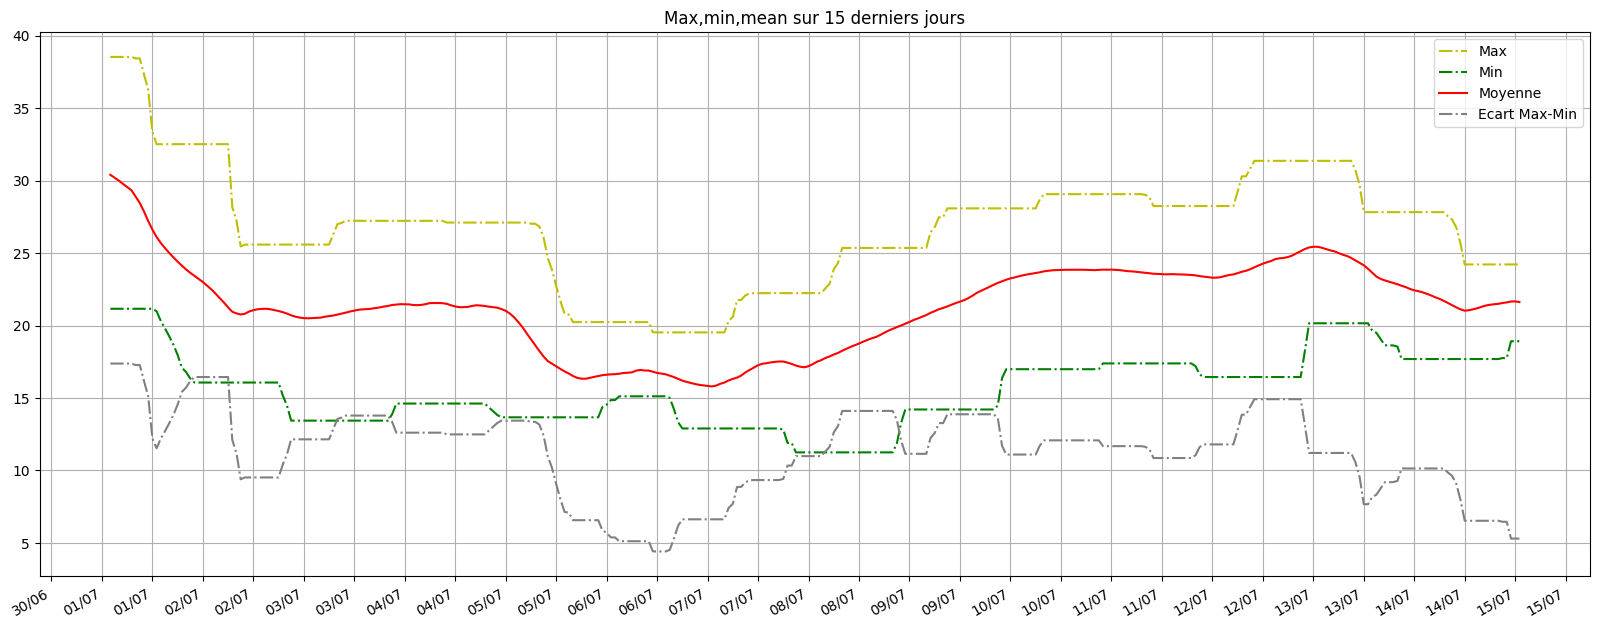

In [1288]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [1289]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

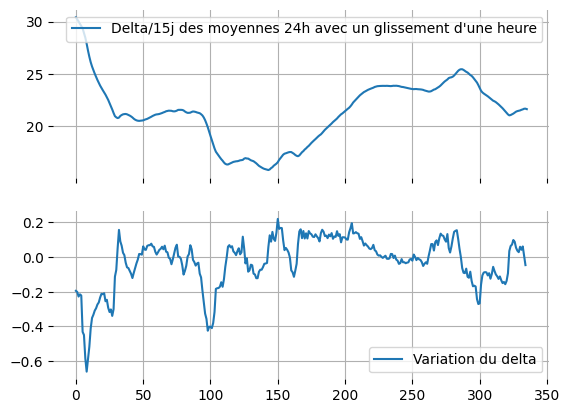

In [1290]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [1291]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [1292]:
# graphical output...
from pylab import sign, diff # type: ignore


In [1293]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


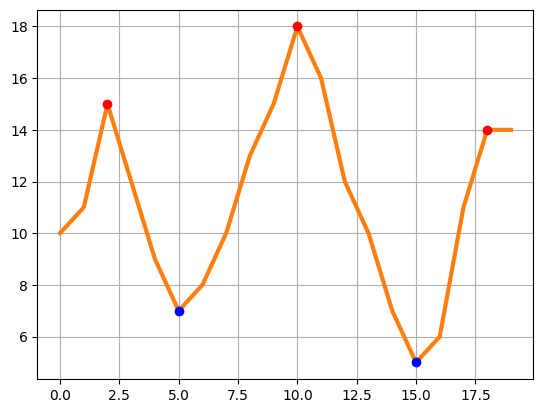

In [1294]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [1295]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
10781,09/07/25,12,21.28,0.95
10782,09/07/25,13,22.57,1.29
10783,09/07/25,14,22.88,0.31
10784,09/07/25,15,23.88,1.00
10785,09/07/25,16,24.32,0.44
...,...,...,...,...
10944,16/07/25,07,18.92,-0.19
10945,16/07/25,08,19.22,0.30
10946,16/07/25,09,19.34,0.12
10947,16/07/25,10,19.96,0.62


In [1296]:
_min_ = round(data.tail(24*jours).temp.min(),2)
_max_ = round(data.tail(24*jours).temp.max(),2)

In [1297]:
_max_ - _min_

np.float64(17.16)

In [1298]:
window_start

'01/07/2025, 11:40:30'

## Main graph

(np.float64(21.715000000000018), 15)

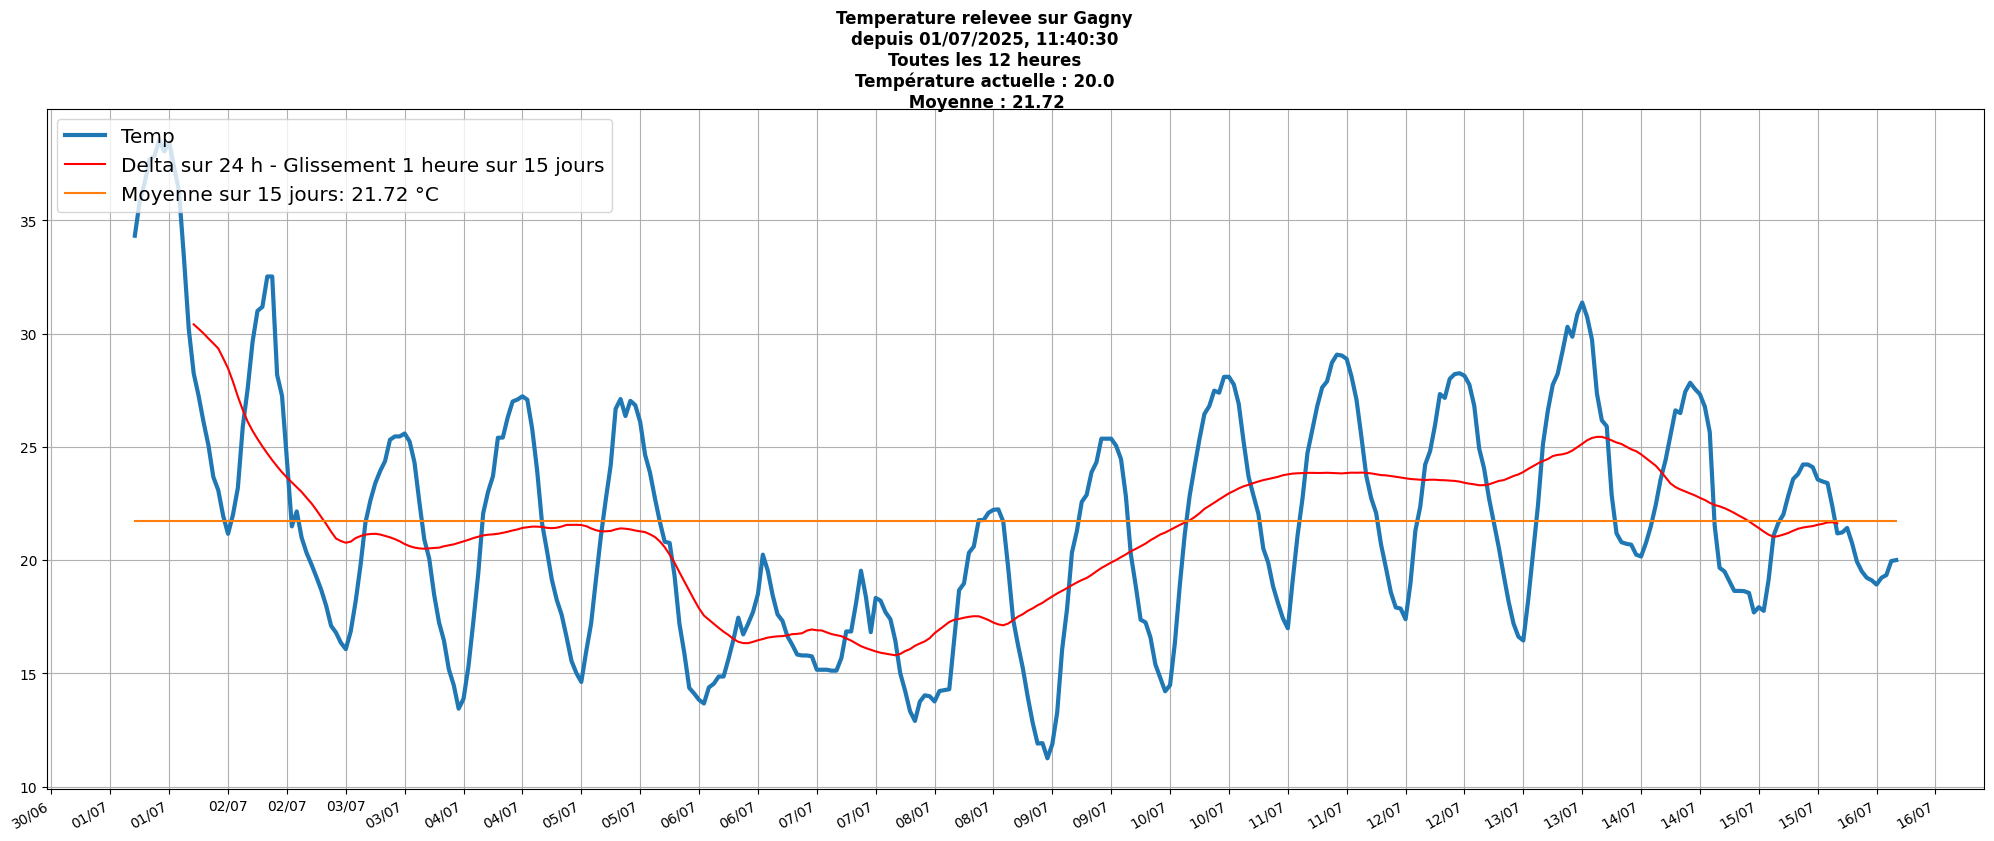

In [1299]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [1300]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
10944,07,18.92,-0.19
10945,08,19.22,0.30
10946,09,19.34,0.12
10947,10,19.96,0.62
10948,11,20.00,0.04


In [1301]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

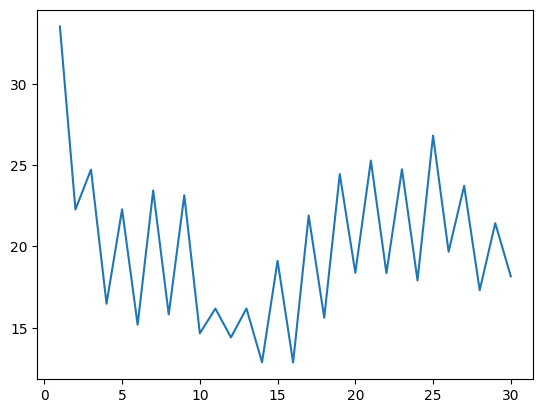

In [1302]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

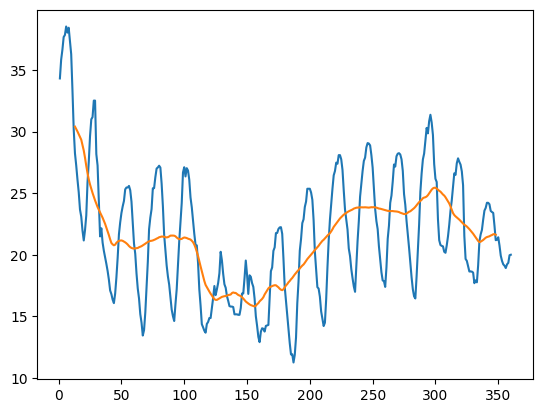

In [1303]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x1333c79ead0>])

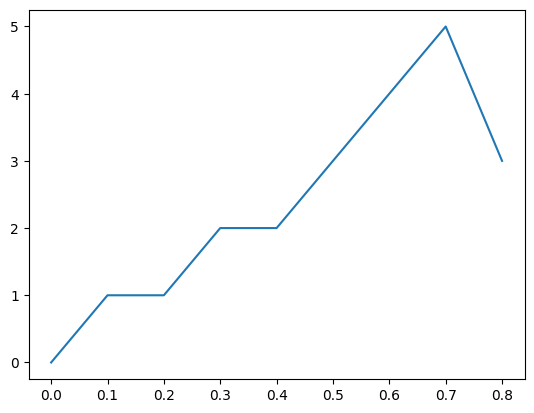

In [1304]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x1333e559f90>])

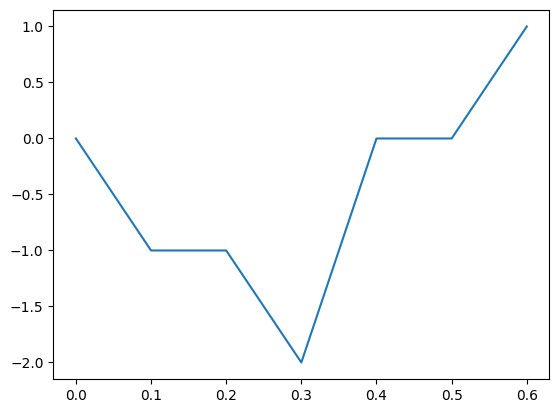

In [1305]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

In [1306]:
n = data.tail(1)['dates'].values[0]
n

'16/07/25 11:00:00'

In [1307]:
end = time.time()
print(end - begin)

32.63014459609985


# Température depuis 7 jours par heure

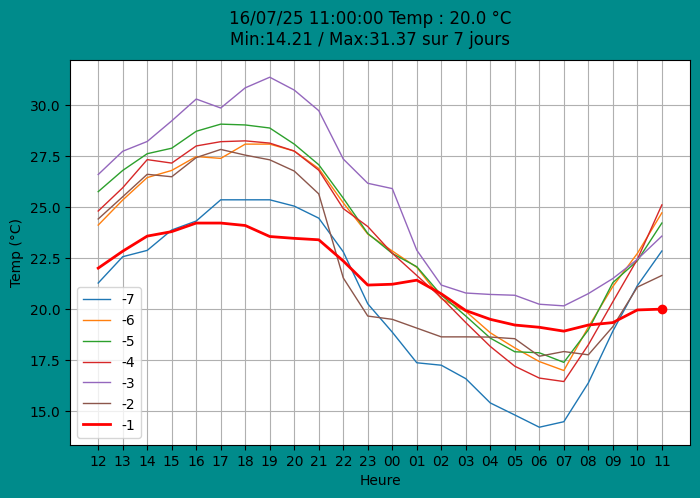

In [1308]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(figsize=(8, 5),facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"{n} Temp : {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min_} / Max:{_max_} sur {jours} jours")
plt.xlabel(f"Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()
plt.show()

In [1309]:
t=7
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))
print(max_,min_)

25.360000000000014 14.210000000000036


In [1310]:
df_jours=data.tail(24*7)
df

[0, -1, -1, -2, 0, 0, 1]

In [1311]:
df_jours.groupby('jours')['temp'].mean()

jours
09/07/25    23.632500
10/07/25    21.899167
11/07/25    23.851250
12/07/25    23.548333
13/07/25    24.460833
14/07/25    23.650833
15/07/25    21.125417
16/07/25    19.882500
Name: temp, dtype: float64

<Axes: xlabel='jours'>

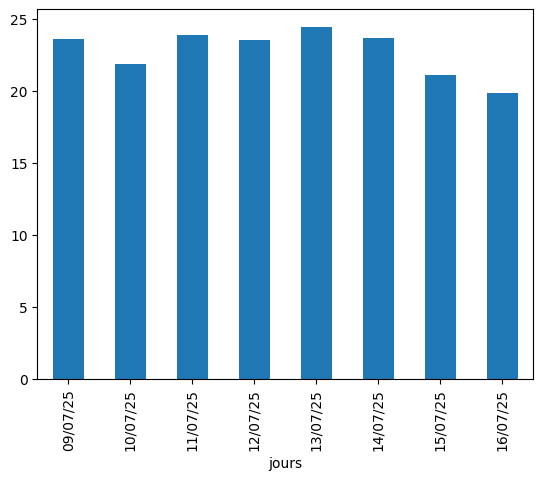

In [1312]:
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')

In [1313]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [1314]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

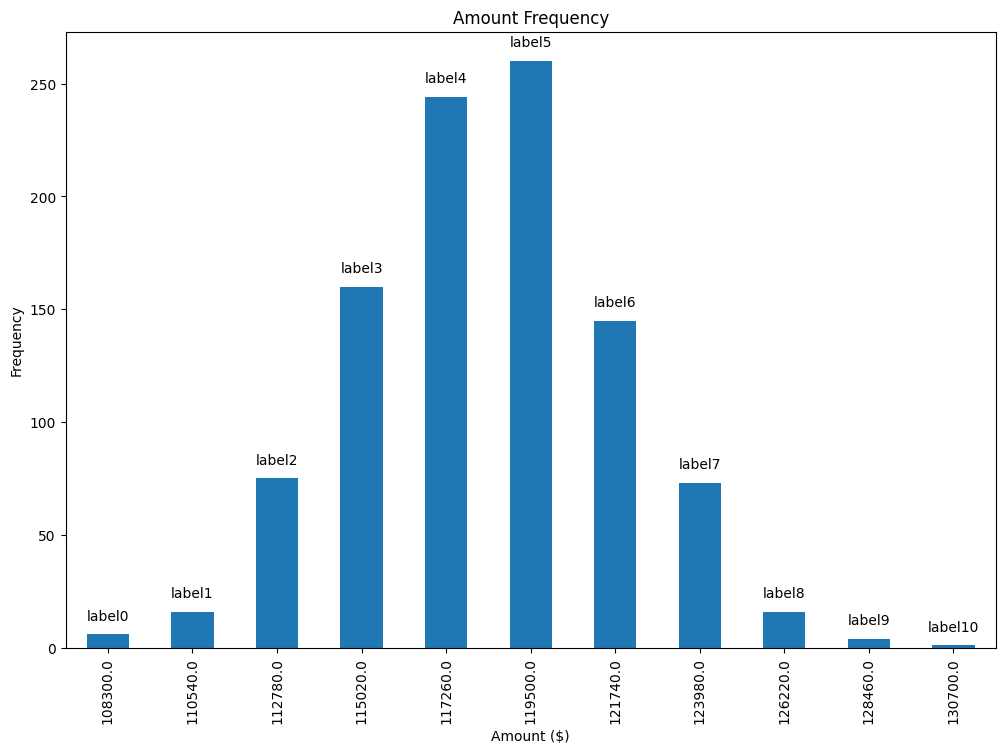

In [1315]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [1316]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25,
 [np.float64(20.49),
  np.float64(23.38),
  np.float64(23.86),
  np.float64(23.38),
  np.float64(25.37),
  np.float64(22.34),
  np.float64(21.56)])

In [1317]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
10944,18.92,20285.291667,16/07/25 07:00:00,-0.19,07,16/07/25
10945,19.22,20285.333333,16/07/25 08:00:00,0.30,08,16/07/25
10946,19.34,20285.375000,16/07/25 09:00:00,0.12,09,16/07/25
10947,19.96,20285.416667,16/07/25 10:00:00,0.62,10,16/07/25


In [1318]:
areas


[20.44, 23.36, 23.84, 23.33, 25.41, 22.33, 21.59]

[Text(-8.0, 0, '-7'),
 Text(-7.0, 0, '-6'),
 Text(-6.0, 0, '-5'),
 Text(-5.0, 0, '-4'),
 Text(-4.0, 0, '-3'),
 Text(-3.0, 0, '-2'),
 Text(-2.0, 0, '-1'),
 Text(-1.0, 0, ''),
 Text(0.0, 0, '')]

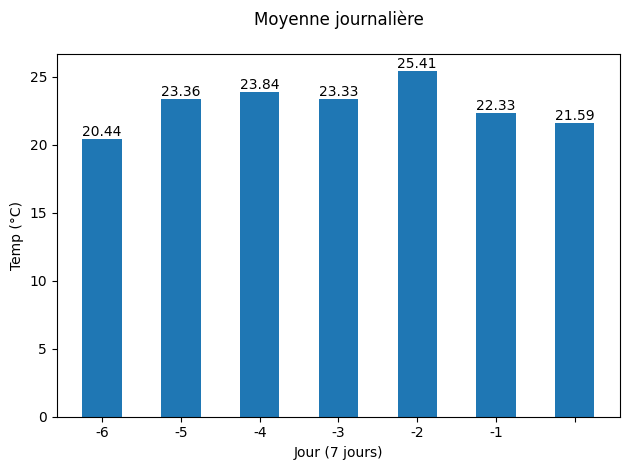

In [1319]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )
ax.set_xticklabels(X_axis)


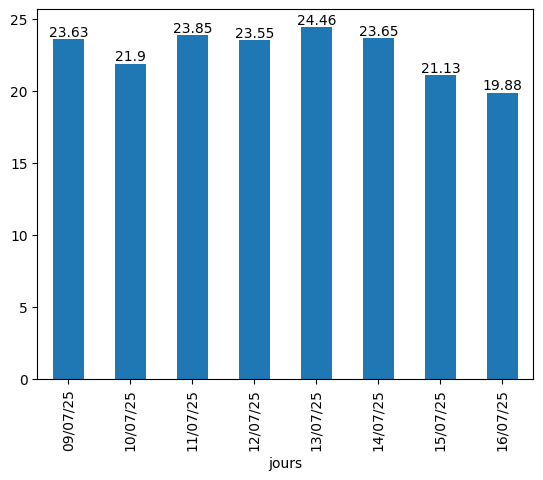

In [1320]:
fig, ax = plt.subplots()
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')
rects = ax.patches

# Make some labels.
labels = [round(rects[i].get_height(),2) for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )


In [1321]:
labels

[np.float64(23.63),
 np.float64(21.9),
 np.float64(23.85),
 np.float64(23.55),
 np.float64(24.46),
 np.float64(23.65),
 np.float64(21.13),
 np.float64(19.88)]

In [1322]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([22.010000000000048,
  22.840000000000032,
  23.58000000000004,
  23.80000000000001,
  24.220000000000027,
  24.220000000000027,
  24.100000000000023,
  23.56,
  23.470000000000027,
  23.40000000000004,
  22.360000000000014,
  21.180000000000007,
  21.220000000000027,
  21.420000000000016,
  20.75,
  19.930000000000007,
  19.5,
  19.220000000000027,
  19.110000000000014,
  18.920000000000016,
  19.220000000000027,
  19.340000000000032,
  19.96000000000004,
  20.0],
 496.3250000000005)

In [1323]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

496.3250000000005

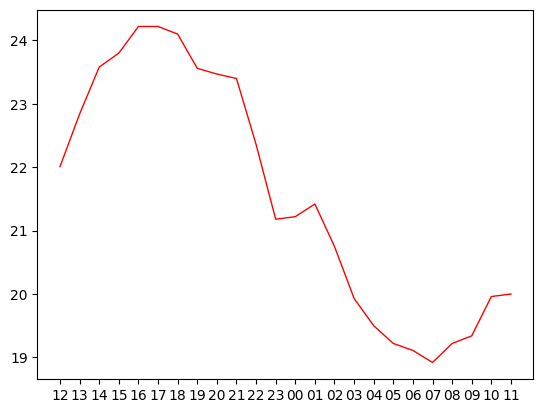

In [1324]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [1325]:
data.tail()


,temp,hours,dates,variation,heures,jours
10944,18.92,20285.291667,16/07/25 07:00:00,-0.19,07,16/07/25
10945,19.22,20285.333333,16/07/25 08:00:00,0.30,08,16/07/25
10946,19.34,20285.375000,16/07/25 09:00:00,0.12,09,16/07/25
10947,19.96,20285.416667,16/07/25 10:00:00,0.62,10,16/07/25
10948,20.00,20285.458333,16/07/25 11:00:00,0.04,11,16/07/25


In [1326]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([24.220000000000027, 21.420000000000016],
 [22.010000000000048, 21.180000000000007, 18.920000000000016],
 2,
 3)

In [1327]:
_diff=[M-m for M,m in zip(_max, _min)]

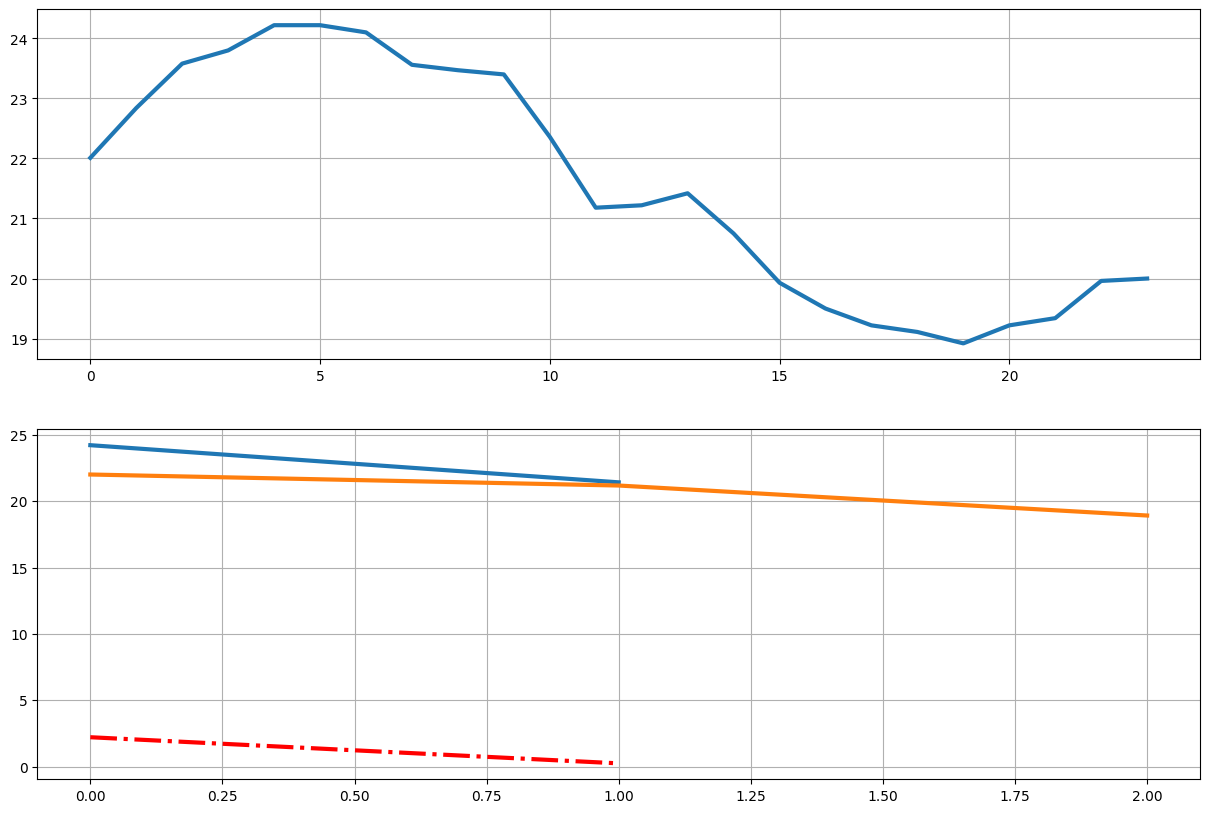

In [1328]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [] 0
[] 0 [] 0


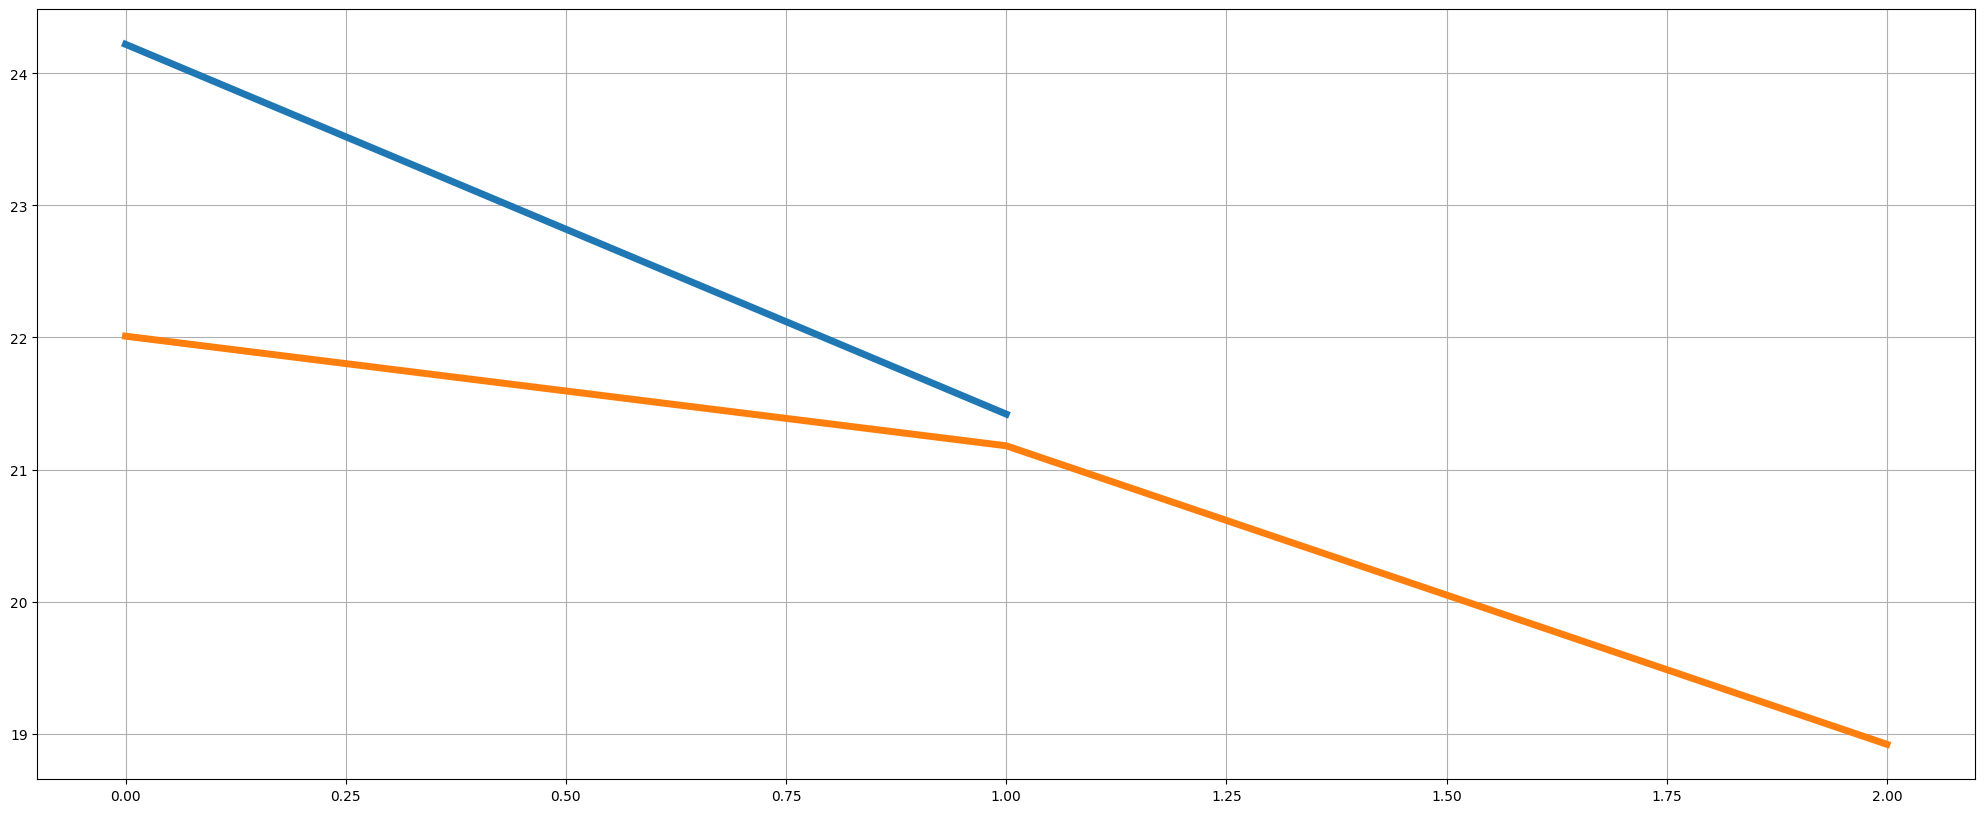

In [1329]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [1330]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [1331]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [1332]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [1333]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [1334]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17]),)

# maximas, minimas

[ 5 15] 2 [ 2 10 18] 3


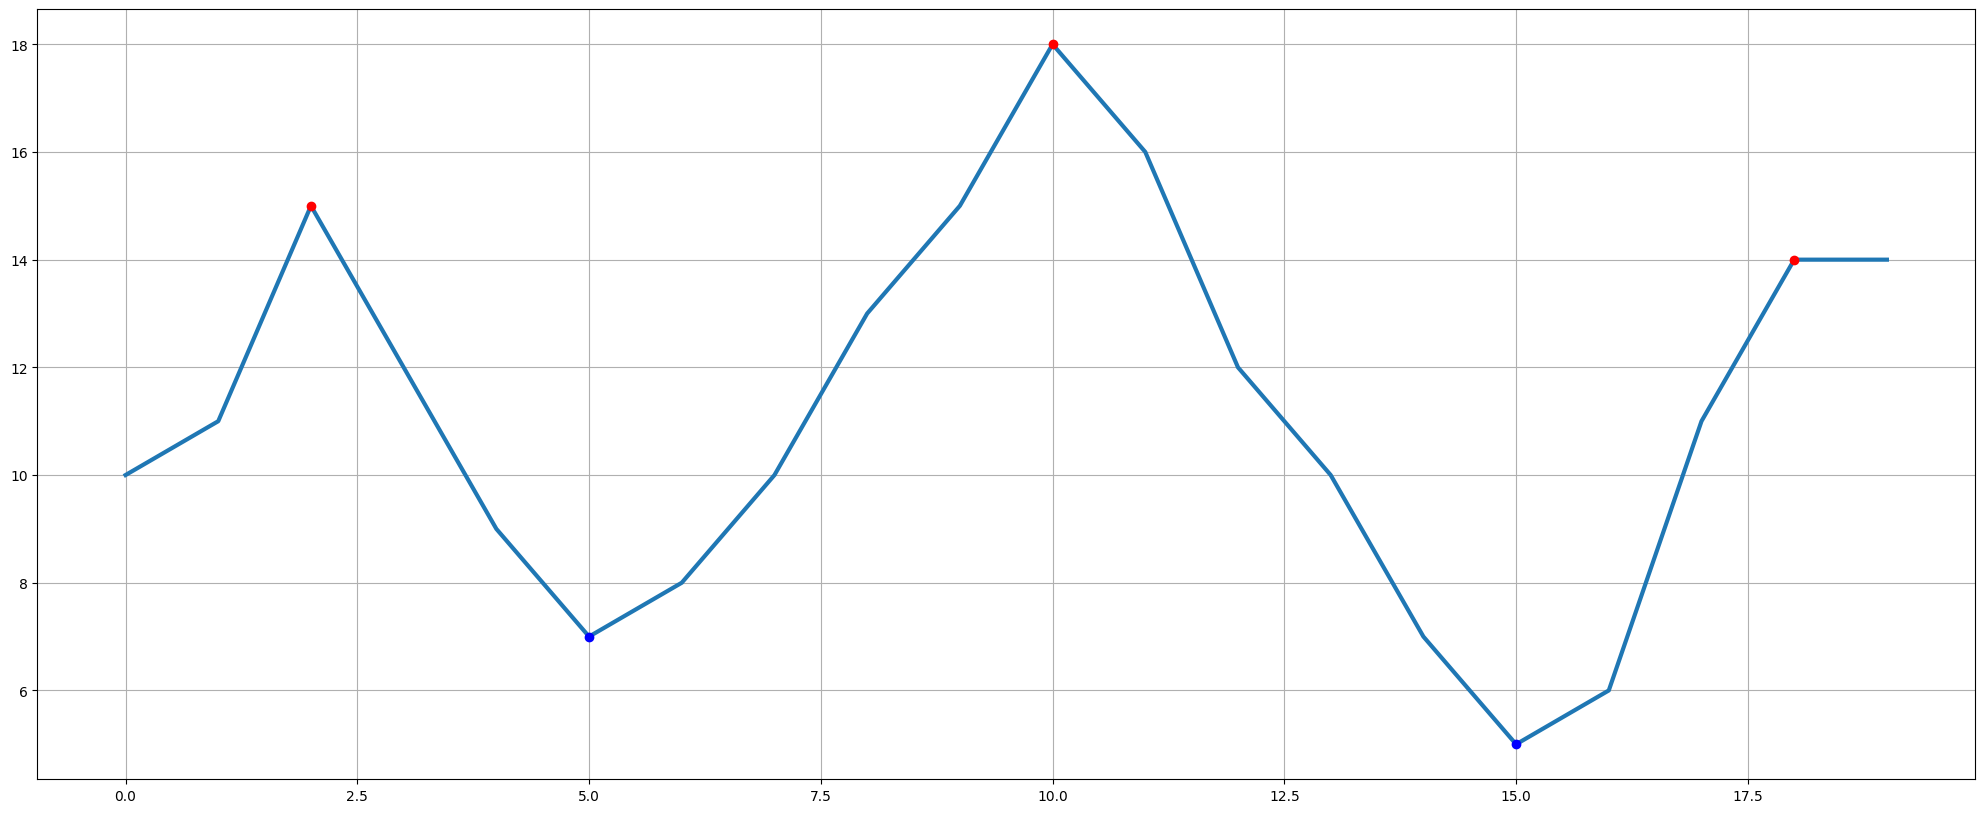

In [1335]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [1336]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [1337]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
10781,21.28,17.504167
10782,22.57,17.612917
10783,22.88,17.762917
10784,23.88,17.869583
10785,24.32,18.006250
...,...,...
10944,18.92,21.560000
10945,19.22,21.601667
10946,19.34,21.662500
10947,19.96,21.670833


# temperature, moyenne, variation

<Axes: >

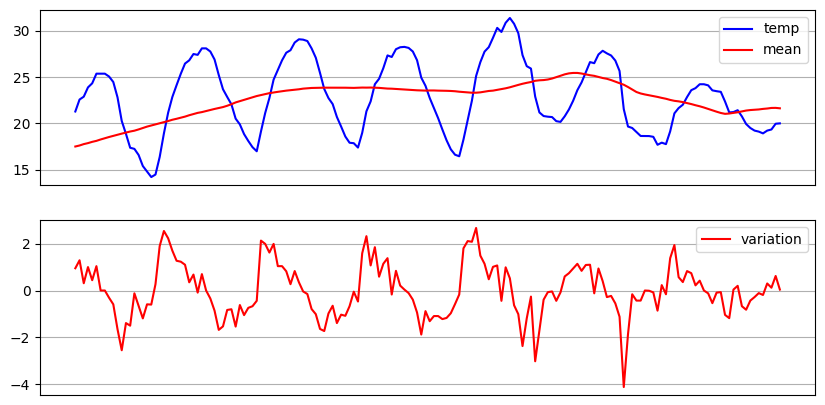

In [1338]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [1339]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(np.float64(31.370000000000005), np.float64(14.210000000000036))

In [1340]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [1341]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 25.76 14.76 11.0
J -28 28.34 15.77 12.57
J -27 28.58 17.12 11.46
J -26 30.56 17.97 12.59
J -25 31.22 17.17 14.05
J -24 34.03 20.68 13.35
J -23 29.31 17.46 11.85
J -22 25.95 13.42 12.53
J -21 30.51 17.63 12.88
J -20 35.79 19.23 16.56
J -19 26.81 20.06 6.75
J -18 27.41 18.71 8.7
J -17 30.59 18.33 12.26
J -16 30.35 20.02 10.33
J -15 35.32 22.22 13.1
J -14 38.54 21.16 17.38
J -13 32.52 16.07 16.45
J -12 25.59 13.44 12.15
J -11 27.23 14.62 12.61
J -10 27.11 13.67 13.44
J -9 20.24 14.86 5.38
J -8 19.53 12.9 6.63
J -7 22.24 11.25 10.99
J -6 25.36 14.21 11.15
J -5 28.09 16.99 11.1
J -4 29.07 17.39 11.68
J -3 28.25 16.45 11.8
J -2 31.37 20.16 11.21
J -1 27.83 17.69 10.14
J 0 24.22 18.92 5.3


<Axes: >

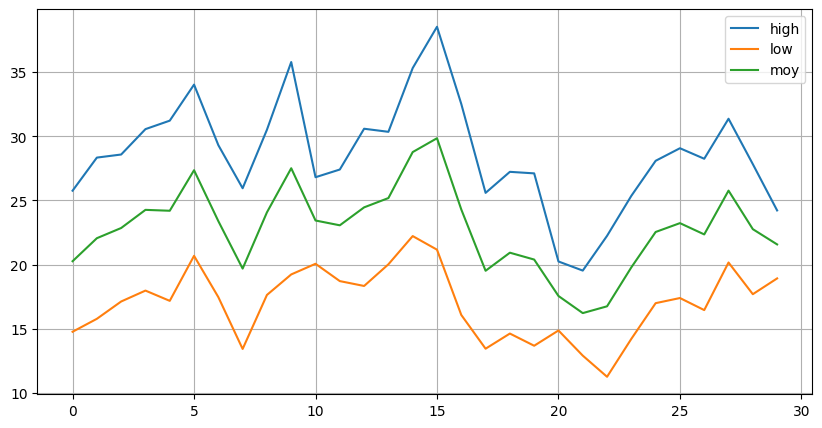

In [1342]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [1343]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[34.03, 35.79, 30.59, 38.54, 27.23, 29.07, 31.37]

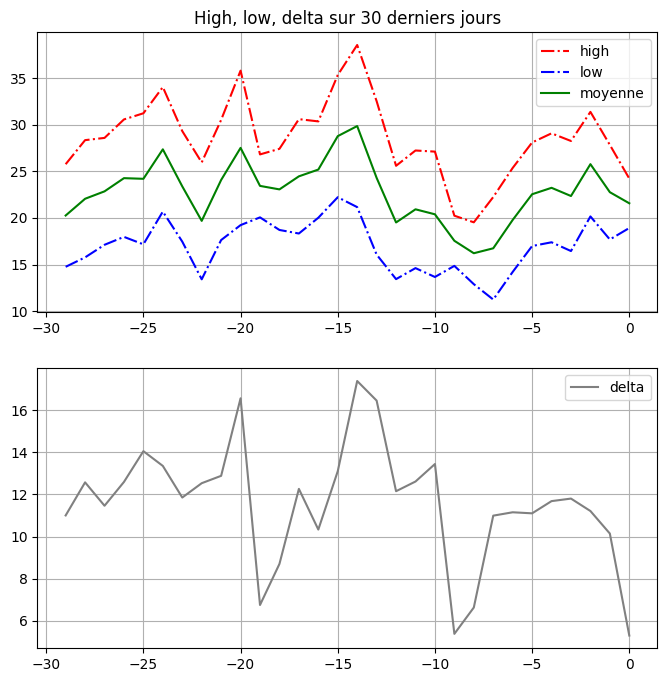

In [1344]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [1345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       10949 non-null  float64
 1   hours      10949 non-null  float64
 2   dates      10949 non-null  object 
 3   variation  10948 non-null  float64
 4   heures     10949 non-null  object 
 5   jours      10949 non-null  object 
dtypes: float64(3), object(3)
memory usage: 513.4+ KB


In [1346]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [1347]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [1348]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

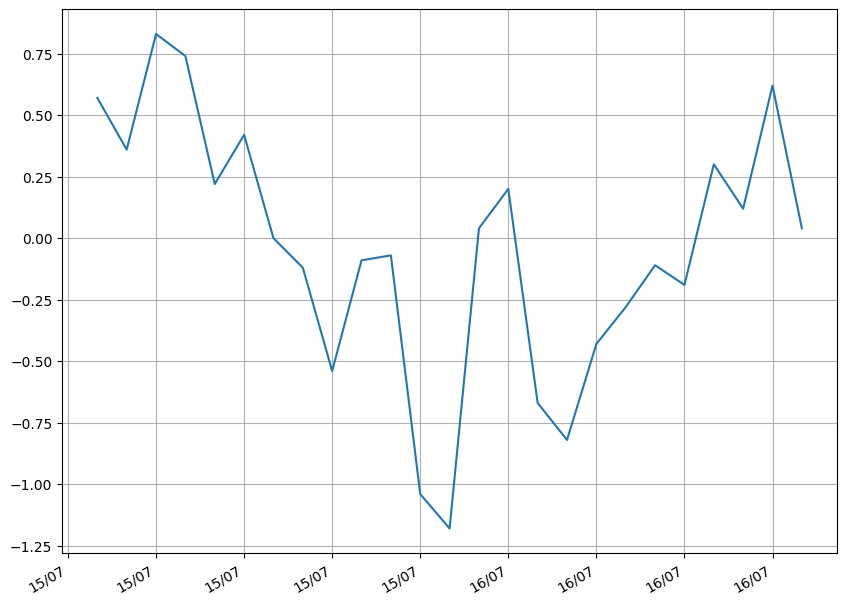

In [1349]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [1350]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, np.float64(38.54000000000002), np.float64(11.25))

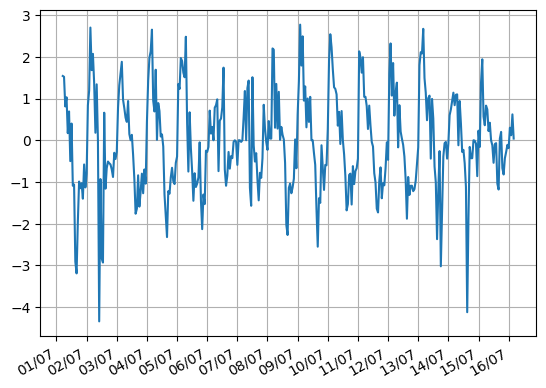

In [1351]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [1352]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(np.float64(38.54000000000002),
 10594    01/07/25 17:00:00
 Name: dates, dtype: object)

In [1353]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(np.float64(11.25),
 4700     29/10/24 03:00:00
 4701     29/10/24 04:00:00
 4932     07/11/24 19:00:00
 5207     19/11/24 06:00:00
 9310     09/05/25 05:00:00
 10775    09/07/25 06:00:00
 Name: dates, dtype: object)

In [1354]:
data.tail(w)['temp'].describe()

count    360.000000
mean      21.715000
std        5.331116
min       11.250000
25%       17.595000
50%       21.180000
75%       25.402500
max       38.540000
Name: temp, dtype: float64

In [1355]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('16/07/25 11:40:50', np.float64(20.0))

In [1356]:
# current date and time
ts = datetime.timestamp(today)
ts

1752658850.415946